<a href="https://colab.research.google.com/github/sahoopuspanjali/PracticalMachineLearning/blob/master/Homework4_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784 (tied weights)
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)
3. VAE


In [0]:
# Choose Python 3 runtime
!pip install --upgrade tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
(X_train_orig, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train_orig, X_test))
all_data.shape

(70000, 28, 28)

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [0]:
def print_first_10(data):
  fig = plt.figure()
  for i in range(10):
    plt.subplot(2,5,i+1)
    #plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Image: {}".format(i))
    plt.xticks([])
    plt.yticks([])

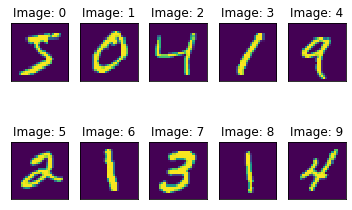

In [6]:
print_first_10(all_data)

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value.
max_value = float(X_train_orig.max())
X_Train = X_train_orig.astype(np.float32) / max_value
X_Test = X_test.astype(np.float32) / max_value

#Train and validation split
X_train, X_valid = X_Train[:-7000], X_Train[-7000:]

In [8]:
X_train.shape, X_valid.shape

((53000, 28, 28), (7000, 28, 28))

1.Stacked Autoencoder(784 - 392 - 196 - 392 - 784 (tied weights))

In [9]:
    #Stacked Autoencoder with functional model
    #encoder
    inputs = keras.Input(shape=(28,28))
    lr_flatten = keras.layers.Flatten()(inputs)
    lr1 = keras.layers.Dense(392, activation="selu")(lr_flatten)
    lr2 = keras.layers.Dense(196, activation="selu")(lr1)

    #decoder
    lr3 =  keras.layers.Dense(392, activation="selu")(lr2)
    lr4 =  keras.layers.Dense(28 * 28, activation="sigmoid")(lr3)
    outputs = keras.layers.Reshape([28, 28])(lr4)
    stacked_ae1 = keras.Model(inputs,outputs)
    stacked_ae1.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))
    h_stack1 = stacked_ae1.fit(X_train, X_train, epochs=20,validation_data=[X_valid, X_valid])

Train on 53000 samples, validate on 7000 samples
Epoch 1/20
53000/53000 [==============================] - 17s 316us/sample - loss: 0.1323 - val_loss: 0.0983
Epoch 2/20
53000/53000 [==============================] - 16s 300us/sample - loss: 0.0879 - val_loss: 0.0854
Epoch 3/20
53000/53000 [==============================] - 16s 302us/sample - loss: 0.0805 - val_loss: 0.0808
Epoch 4/20
53000/53000 [==============================] - 16s 294us/sample - loss: 0.0771 - val_loss: 0.0789
Epoch 5/20
53000/53000 [==============================] - 16s 302us/sample - loss: 0.0749 - val_loss: 0.0760
Epoch 6/20
53000/53000 [==============================] - 16s 305us/sample - loss: 0.0734 - val_loss: 0.0742
Epoch 7/20
53000/53000 [==============================] - 16s 300us/sample - loss: 0.0723 - val_loss: 0.0741
Epoch 8/20
53000/53000 [==============================] - 16s 303us/sample - loss: 0.0715 - val_loss: 0.0725
Epoch 9/20
53000/53000 [==============================] - 16s 307us/sample - lo

Displays the original images and their reconstructions:

In [0]:
def show_reconstructions(model, images=X_valid, n_images=10):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

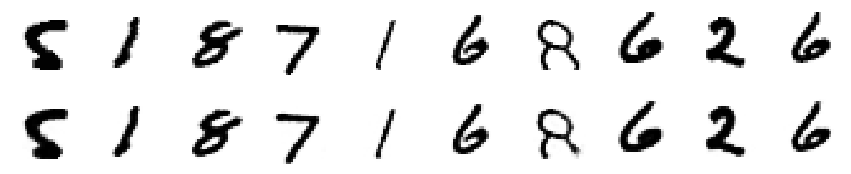

In [11]:
show_reconstructions(stacked_ae1)

2.Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)

In [0]:
#Convolutional model

inputs = keras.Input(shape=(28,28))
inputs1 = keras.layers.Reshape([28, 28, 1])(inputs)
# Ecoding
conv1_1 = keras.layers.Conv2D(16, (3, 3), padding='same', activation='selu' )(inputs1) 
pool1 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1_1) 
conv1_2 = keras.layers.Conv2D(32,(3, 3), padding='same', activation='selu')(pool1) 
pool2 = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1_2)
conv1_3 = keras.layers.Conv2D(64,(3, 3), padding='same', activation='selu')(pool2)
#encoder = keras.layers.MaxPooling2D(pool_size=(2,2))(conv1_3)

# Decoding
conv2_1 = keras.layers.Conv2D(32,(3, 3),  padding="same", activation='selu')(conv1_3)
unsamp1 = keras.layers.UpSampling2D((2, 2))(conv2_1)
#conv2_2 = keras.layers.Conv2D(32,(3, 3), padding='same', activation='selu')(unsamp1)
#unsamp2 = keras.layers.UpSampling2D((2, 2))(conv2_2) 
conv2_3 = keras.layers.Conv2D(16,(3, 3), padding='same', activation='selu')(unsamp1) 
unsamp3 = keras.layers.UpSampling2D((2, 2))(conv2_3)
conv2_4 = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(unsamp3)

outputs = keras.layers.Reshape([28, 28])(conv2_4)


In [13]:
conv_ae = keras.Model(inputs,outputs)
conv_ae.compile(loss="mean_squared_error",optimizer='adam')
conv_ae.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1849

In [22]:
h_conv = conv_ae.fit(X_train, X_train, epochs=20,validation_data=[X_valid, X_valid])

Train on 53000 samples, validate on 7000 samples
Epoch 1/20
53000/53000 [==============================] - 136s 3ms/sample - loss: 0.0061 - val_loss: 0.0030
Epoch 2/20
53000/53000 [==============================] - 134s 3ms/sample - loss: 0.0023 - val_loss: 0.0020
Epoch 3/20
53000/53000 [==============================] - 131s 2ms/sample - loss: 0.0018 - val_loss: 0.0017
Epoch 4/20
53000/53000 [==============================] - 131s 2ms/sample - loss: 0.0016 - val_loss: 0.0015
Epoch 5/20
53000/53000 [==============================] - 134s 3ms/sample - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
53000/53000 [==============================] - 133s 3ms/sample - loss: 0.0013 - val_loss: 0.0013
Epoch 7/20
53000/53000 [==============================] - 129s 2ms/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 8/20
53000/53000 [==============================] - 127s 2ms/sample - loss: 0.0012 - val_loss: 0.0012
Epoch 9/20
53000/53000 [==============================] - 131s 2ms/sample - loss: 0.001

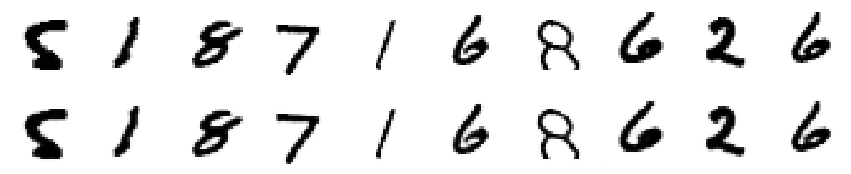

In [23]:
show_reconstructions(conv_ae)

Convolutional Encoder with Conv2DTranspose

In [16]:
inputs = keras.Input(shape=(28,28))
# Ecoding
inputs1 = keras.layers.Reshape([28, 28, 1])(inputs)
conv1_1 = keras.layers.Conv2D(16, (3,3), padding="same", activation="selu")(inputs1) 
pool1 = keras.layers.MaxPool2D(pool_size=2)(conv1_1)
conv1_2 = keras.layers.Conv2D(32, (3,3), padding="same", activation="selu")(pool1)
pool2 = keras.layers.MaxPool2D(pool_size=2)(conv1_2)
conv1_3 = keras.layers.Conv2D(64, (3,3), padding="same", activation="selu")(pool2)
pool3 = keras.layers.MaxPool2D(pool_size=2)(conv1_3)
# Decoding
conv2_1 = keras.layers.Conv2DTranspose(32, (3,3), strides=2, padding="valid", activation="selu",input_shape=[3, 3, 64])(pool3)
conv2_2 = keras.layers.Conv2DTranspose(16, (3,3), strides=2, padding="same",activation="selu")(conv2_1)
conv2_3 = keras.layers.Conv2DTranspose(1, (3,3), strides=2, padding="same", activation="sigmoid")(conv2_2)
outputs = keras.layers.Reshape([28, 28])(conv2_3)

conv_ae1 = keras.models.Model(inputs, outputs)
conv_ae1.compile(loss="mean_squared_error",optimizer='adam')
conv_ae1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          1849

In [17]:
h_conv_ae1 = conv_ae1.fit(X_train, X_train, epochs=20,validation_data=[X_valid, X_valid])

Train on 53000 samples, validate on 7000 samples
Epoch 1/20
53000/53000 [==============================] - 71s 1ms/sample - loss: 0.0195 - val_loss: 0.0076
Epoch 2/20
53000/53000 [==============================] - 70s 1ms/sample - loss: 0.0061 - val_loss: 0.0052
Epoch 3/20
53000/53000 [==============================] - 71s 1ms/sample - loss: 0.0047 - val_loss: 0.0043
Epoch 4/20
53000/53000 [==============================] - 72s 1ms/sample - loss: 0.0040 - val_loss: 0.0038
Epoch 5/20
53000/53000 [==============================] - 74s 1ms/sample - loss: 0.0035 - val_loss: 0.0034
Epoch 6/20
53000/53000 [==============================] - 71s 1ms/sample - loss: 0.0031 - val_loss: 0.0031
Epoch 7/20
53000/53000 [==============================] - 73s 1ms/sample - loss: 0.0029 - val_loss: 0.0029
Epoch 8/20
53000/53000 [==============================] - 72s 1ms/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 9/20
53000/53000 [==============================] - 74s 1ms/sample - loss: 0.0026 - val_l

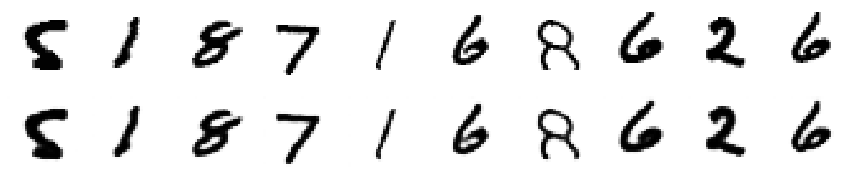

In [18]:
show_reconstructions(conv_ae1)

3.Variational Autoencoder

In [0]:
K = keras.backend
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [20]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
h_vae = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=[X_valid, X_valid])

Train on 53000 samples, validate on 7000 samples
Epoch 1/25
53000/53000 [==============================] - 9s 161us/sample - loss: 0.2258 - val_loss: 0.1924
Epoch 2/25
53000/53000 [==============================] - 7s 137us/sample - loss: 0.1788 - val_loss: 0.1777
Epoch 3/25
53000/53000 [==============================] - 7s 132us/sample - loss: 0.1670 - val_loss: 0.1696
Epoch 4/25
53000/53000 [==============================] - 7s 137us/sample - loss: 0.1611 - val_loss: 0.1629
Epoch 5/25
53000/53000 [==============================] - 7s 134us/sample - loss: 0.1576 - val_loss: 0.1660
Epoch 6/25
53000/53000 [==============================] - 8s 143us/sample - loss: 0.1551 - val_loss: 0.1601
Epoch 7/25
53000/53000 [==============================] - 7s 139us/sample - loss: 0.1533 - val_loss: 0.1593
Epoch 8/25
53000/53000 [==============================] - 7s 137us/sample - loss: 0.1519 - val_loss: 0.1531
Epoch 9/25
53000/53000 [==============================] - 7s 139us/sample - loss: 0.150

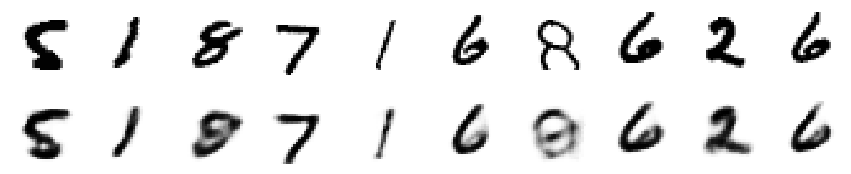

In [21]:
show_reconstructions(variational_ae)